In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
train_data = train_data.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_data = test_data.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28, 1)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

Epoch 1/25
375/375 [==============================] - 3s 6ms/step - loss: 0.1240 - accuracy: 0.7576 - val_loss: 0.0886 - val_accuracy: 0.8248
Epoch 2/25
375/375 [==============================] - 2s 5ms/step - loss: 0.0814 - accuracy: 0.8374 - val_loss: 0.0748 - val_accuracy: 0.8507
Epoch 3/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0724 - accuracy: 0.8538 - val_loss: 0.0723 - val_accuracy: 0.8543
Epoch 4/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0671 - accuracy: 0.8649 - val_loss: 0.0764 - val_accuracy: 0.8428
Epoch 5/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0632 - accuracy: 0.8717 - val_loss: 0.0643 - val_accuracy: 0.8697
Epoch 6/25
375/375 [==============================] - 1s 4ms/step - loss: 0.0602 - accuracy: 0.8792 - val_loss: 0.0630 - val_accuracy: 0.8706
Epoch 7/25
375/375 [==============================] - 1s 3ms/step - loss: 0.0580 - accuracy: 0.8834 - val_loss: 0.0629 - val_accuracy: 0.8733
Epoch 

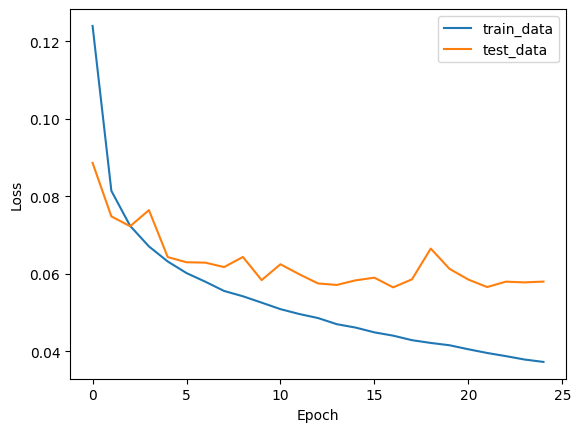

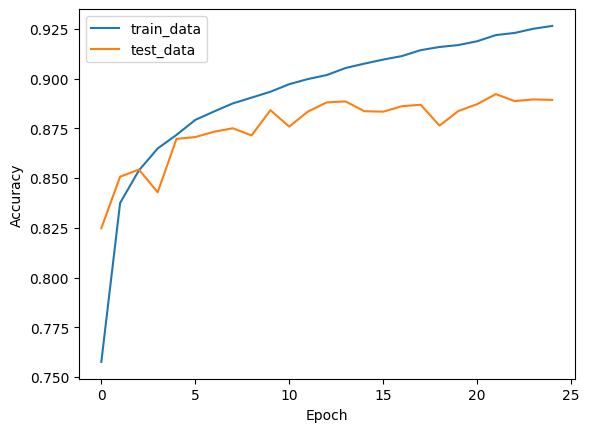

In [5]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_data, train_labels, epochs=25, batch_size=128, validation_split=0.2)

plt.plot(history.history['loss'], label='train_data')
plt.plot(history.history['val_loss'], label='test_data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train_data')
plt.plot(history.history['val_accuracy'], label='test_data')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [6]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f'Точність: {test_accuracy * 100:.2f}%')

313/313 [==============================] - 0s 1ms/step - loss: 0.0624 - accuracy: 0.8829
Точність: 88.29%
